In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import h5py
from pathlib import Path
import pyart
import matplotlib.pyplot as plt

### About PPI - plan position indicator

When scanning in PPI mode, the radar holds its elevation angle constant but varies its azimuth angle. The returns can then be mapped on a horizontal plane.PPI of the lowest elevation from the polar volume is often used to visualise precipitation near to the ground. The drawback of using the lower elevations as PPI is that they are often corrupted by sea and ground clutter, even after extensive quality control.

![picture](https://geo.libretexts.org/@api/deki/files/6531/Screen_Shot_2020-02-19_at_3.48.41_PM.png?revision=1&size=bestfit&width=200&height=200)
image from [libretexts](https://geo.libretexts.org/Bookshelves/Meteorology_and_Climate_Science/Book%3A_Practical_Meteorology_(Stull)/08%3A_Satellites_and_Radar/8.02%3A_Weather_Radars)

According to Patrícia Catandi (Escritório de Dados):
- each dataset `(dataset1, dataset2,...)` is a elevation angle;
- within these datasets are the products TH, TV, DBZH, DBZV, ZDR, RHOHV, PHIDP, SQI, SNR, VRAD, WRAD which correspond to `data1, data2,..., data11`, respectively.

In [6]:
filename = Path("../data/raw", "9921GUA-PPIVol-20160919-000015-0000.hdf")

In [22]:
with h5py.File(filename, 'r') as h5:
    print(f"Keys Group 1: {h5.keys()}")

    h5_group2 = h5[list(h5.keys())[0]]
    print(f"Keys Group 2: {h5_group2.keys()}")

    h5_group3 = h5_group2[list(h5_group2.keys())[0]]
    print(f"Keys Group 3: {h5_group3.keys()}")
    
    h5_data3 = h5_group3["data"][...]

h5_data3

Keys Group 1: <KeysViewHDF5 ['dataset1', 'dataset10', 'dataset11', 'dataset12', 'dataset13', 'dataset14', 'dataset2', 'dataset3', 'dataset4', 'dataset5', 'dataset6', 'dataset7', 'dataset8', 'dataset9', 'how', 'what', 'where']>
Keys Group 2: <KeysViewHDF5 ['data1', 'data10', 'data11', 'data2', 'data3', 'data4', 'data5', 'data6', 'data7', 'data8', 'data9', 'how', 'what', 'where']>
Keys Group 3: <KeysViewHDF5 ['data', 'what']>


array([[140,  75,  86, ...,   0,   0,   0],
       [142,  71,  76, ...,   0,   0,   0],
       [139,  69,  74, ...,   0,   0,   0],
       ...,
       [142, 111, 114, ...,   0,   0,   0],
       [146,  91, 102, ...,   0,   0,   0],
       [143,  81,  93, ...,   0,   0,   0]], dtype=uint8)

### First elevation angle [`dataset1`] > Product DBZH (horizontal reflectivity)[`data3`]

In [7]:
with h5py.File(filename, 'r') as h5:
    dbzh = h5["dataset1"]["data3"]["data"][...]
    print(dbzh)
    print(f"Shape: {dbzh.shape}")

[[ 83  57   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0  96 105 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [ 85  64   0 ...   0   0   0]]
Shape: (308, 250)


### Graphically representing the values ​​of the 308x250 matrix.

This representation does not take into account the correct structure of weather radar data (only uses `matplotlib`).

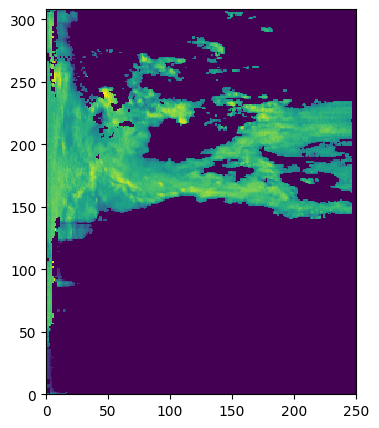

In [16]:
fig = plt.figure(figsize=(4,5));
ax = fig.add_subplot();
ax.pcolormesh(dbzh);

This representation takes into account the correct structure of weather radar data (uses `Py-ART` which is a Python module that contains a collection of weather radar algorithms and utilities).

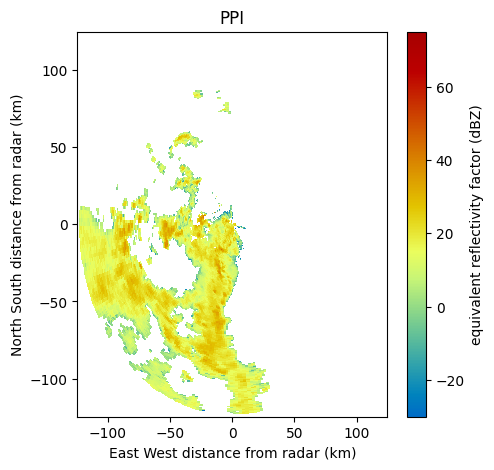

In [20]:
H5_FIELD_NAMES = {
    'TH': 'total_power',
    'TV': 'total_power_vertical',
    'DBZH': 'reflectivity',
    'DBZV': 'reflectivity',
    'ZDR': 'differential_reflectivity',
    'RHOHV': 'cross_correlation_ratio',
    'PHIDP': 'differential_phase',
    'SQI': 'normalized_coherent_power',
    'SNR': 'signal_to_noise_ratio',
    'VRAD': 'velocity',
    'WRAD': 'spectrum_width',
}
radar = pyart.aux_io.read_sinarame_h5(filename, field_names=H5_FIELD_NAMES)
display = pyart.graph.RadarDisplay(radar)
fig = plt.figure(figsize=[5, 5]);
ax = fig.add_subplot();
display.plot('reflectivity', title="PPI", cmap='pyart_HomeyerRainbow')